In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import norms
importlib.reload(norms)
from norms import *

%matplotlib inline

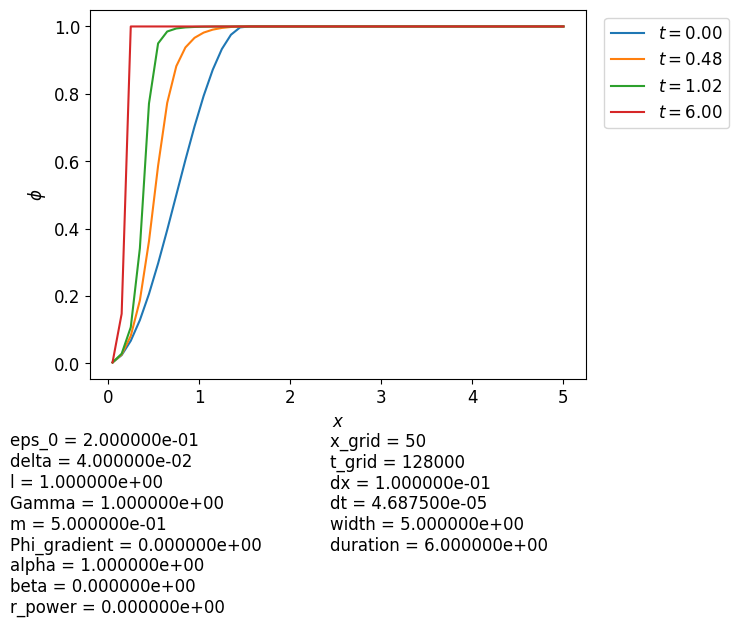

In [2]:
model_50 = model_from_file('../../bin/model_50.csv')
model_plot(model_50, [0, 0.5, 1, 6])

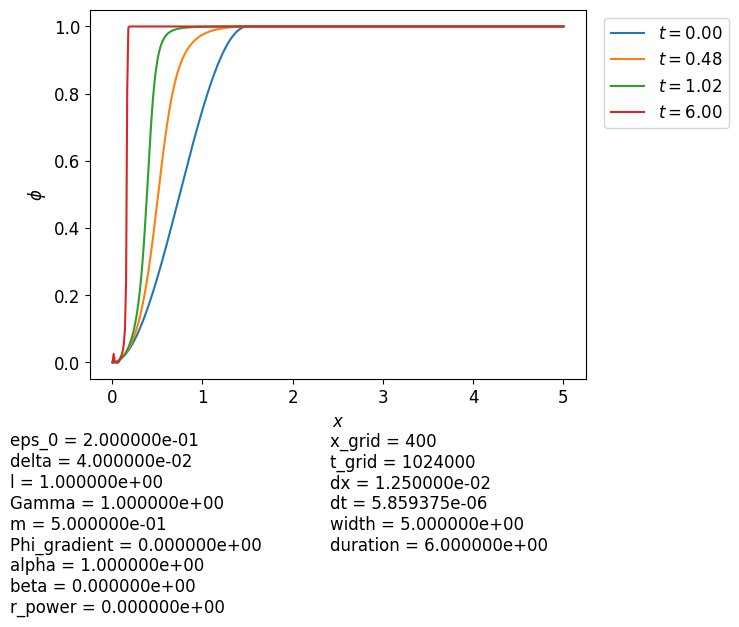

In [3]:
model_400 = model_from_file('../../bin/model_400.csv')
model_plot(model_400, [0, 0.5, 1, 6])